In [1]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [3]:
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_deep.summary()

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,074,762 (240.61 MB)

 Trainable params: 63,074,762 (240.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history_deep = model_deep.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 905s 2s/step - accuracy: 0.1636 - loss: 2.3827 - val_accuracy: 0.1491 - val_loss: 2.2227
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 903s 2s/step - accuracy: 0.1414 - loss: 2.2292 - val_accuracy: 0.1454 - val_loss: 2.2276
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 897s 2s/step - accuracy: 0.1405 - loss: 2.2442 - val_accuracy: 0.1491 - val_loss: 2.2202
Epoch 4/5
423/444 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1528 - loss: 2.2224

In [ ]:
deep_eval = model_deep.evaluate(test_images, test_labels)
print(f'Deep CNN Test Accuracy: {deep_eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 31s 282ms/step - accuracy: 0.3710 - loss: 1.6708
Deep CNN Test Accuracy: 0.3740135431289673


111/111 ━━━━━━━━━━━━━━━━━━━━ 31s 279ms/step


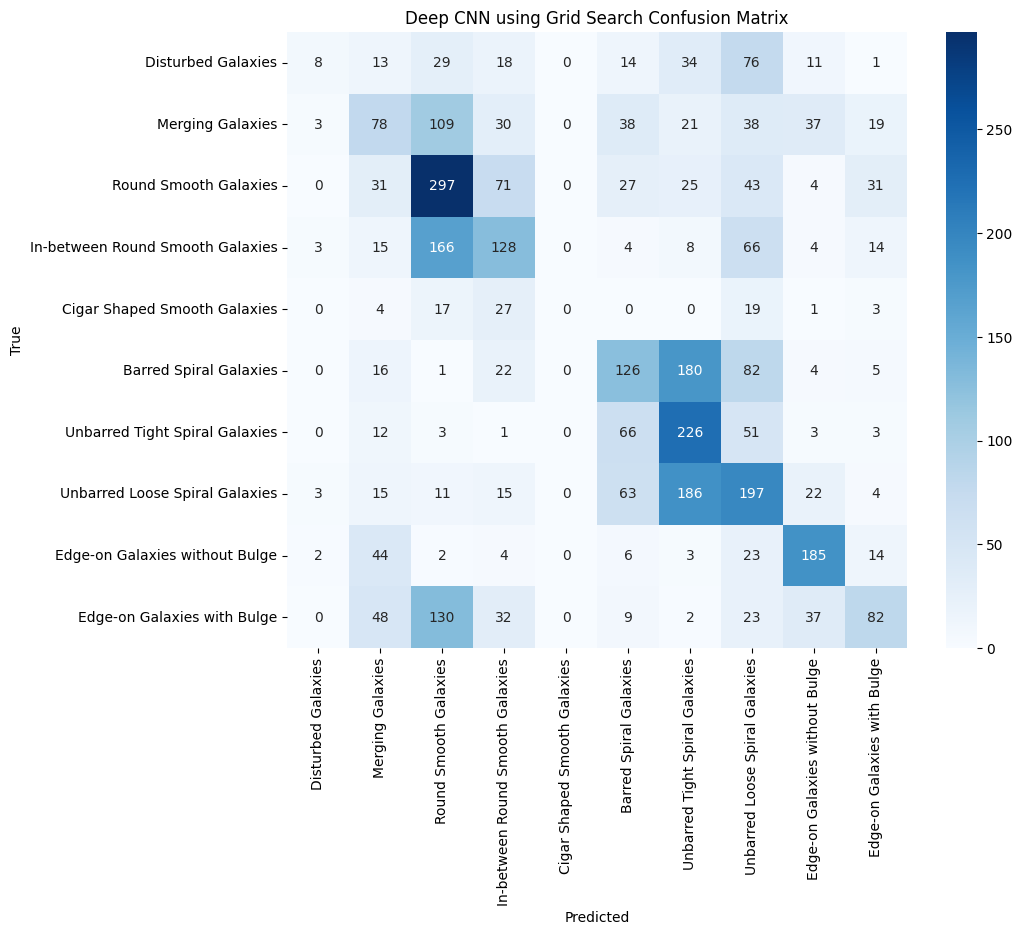

In [ ]:
predictions = model_deep.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]


# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep CNN using Grid Search Confusion Matrix')
plt.show()